In [25]:
import pandas as pd
import seaborn as sns

In [55]:
df = pd.read_csv('median_data.csv')

In [56]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

<Axes: xlabel='overall_rating', ylabel='Count'>

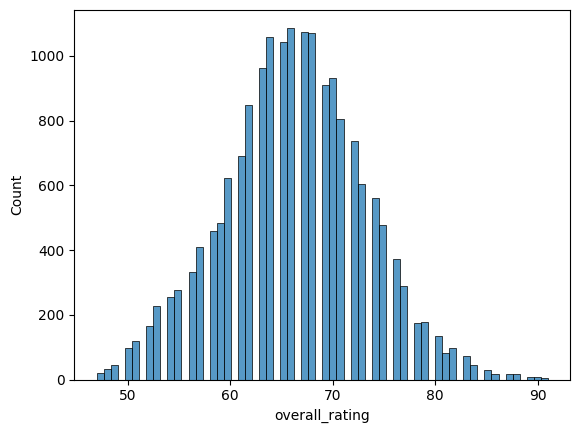

In [57]:
sns.histplot(df['overall_rating'])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [59]:
def evaluate_model(y_train, y_train_pred, y_test, y_pred):
    print('Train Set:')
    print(f'MSE: {mean_squared_error(y_train, y_train_pred)}')
    print(f'MAE: {mean_absolute_error(y_train, y_train_pred)}')
    print(f'R2: {r2_score(y_train, y_train_pred)}')

    print()

    print('Test Set:')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'R2: {r2_score(y_test, y_pred)}')

# Linear Regression

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [61]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.241597908854705
MAE: 1.3957993791835461
R2: 0.9332108172033957

Test Set:
MSE: 3.322241837592516
MAE: 1.4153944654802126
R2: 0.9305976827983435


In [62]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.241597908854705
MAE: 1.3957993791835461
R2: 0.9332108172033957

Test Set:
MSE: 3.322241837592516
MAE: 1.4153944654802126
R2: 0.9305976827983435


In [63]:
# Định nghĩa số lượng folds cho cross-validation
cv = 5

# Sử dụng cross_val_score để tính toán R^2 score
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

# Sử dụng cross_val_score để tính toán MSE (sử dụng scoring 'neg_mean_squared_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# Chuyển đổi MSE về giá trị dương
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

# Đánh giá Mean Absolute Error (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 5-fold cross-validation: [ 0.88461441 -0.03712584 -0.31376627 -0.50465802  0.75355273]
R^2 trung bình: 0.157 ± 0.563

MSE cho 5-fold cross-validation: [ 2.9821364  11.32902867  3.18050434  2.88853662  3.37137015]
MSE trung bình: 4.750± 3.294

MAE cho 5-fold cross-validation: [1.34167205 2.76681048 1.40836896 1.34876198 1.40779316]
MAE trung bình: 1.655 ± 0.557


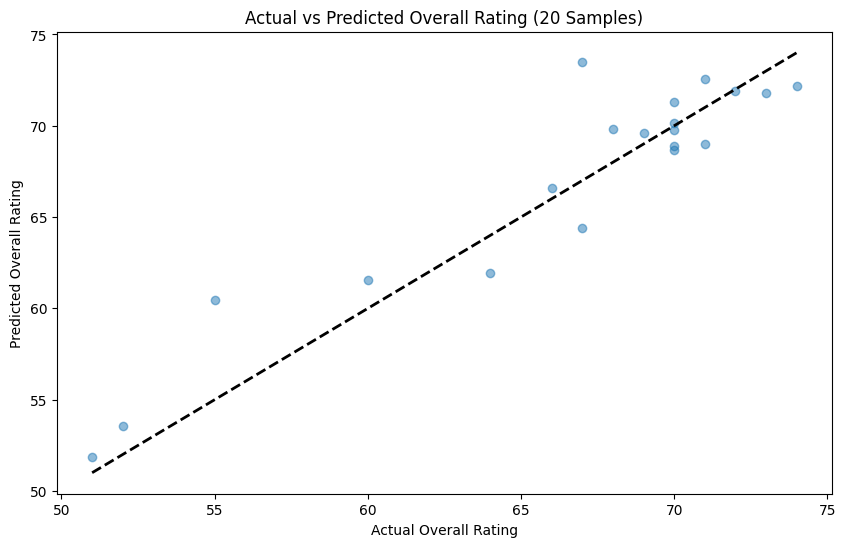

In [64]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:20]
y_pred_sample = y_pred[:20]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (20 Samples)')
plt.show()

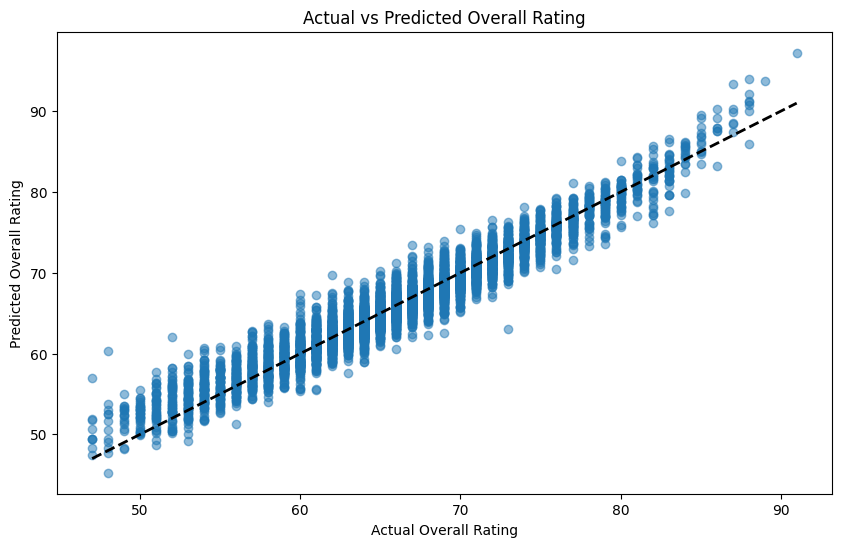

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating')
plt.show()

In [42]:
model = LinearRegression()

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print('Cross Validation Mean Squared Error:', -scores.mean())

Cross Validation Mean Squared Error: 3.695913874127463


In [47]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

scores = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')
print('Leave-One-Out Mean Squared Error:', -scores.mean())

Leave-One-Out Mean Squared Error: 3.2860683959775785


In [51]:
scores[:25]

array([-18.81480773, -18.97088256,  -3.30322091, -10.85482375,
       -25.04135066, -38.96046732, -15.96778121,  -0.20586818,
       -23.66564564,  -0.33666898,  -6.37275595, -26.34108903,
       -66.94007457, -21.19321591,  -0.34677261, -41.45513378,
        -1.21079892,  -4.9670494 ,  -1.45878692,  -8.81828979,
       -10.50576809,  -0.55036604,  -2.13799164,  -8.64546368,
       -11.57048764])

# Use target encoder for column 'nationality'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('unencoded_nation_data.csv')
df.head()

,age,weight_kgs,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),...,positions_LB,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,height_cm
0,27,76.2,Denmark,88,89,69500000.0,205000.0,1,3,5,...,0,0,0,0,0,1,0,0,0,175.26
1,25,83.9,France,88,91,73000000.0,255000.0,1,4,4,...,0,0,0,0,0,0,0,0,0,190.50
2,27,59.0,Italy,88,88,62000000.0,165000.0,1,3,4,...,0,0,1,0,0,0,0,0,1,162.56
3,27,88.9,Senegal,88,91,60000000.0,135000.0,1,3,3,...,0,0,0,0,0,0,0,0,0,187.96
4,27,92.1,Netherlands,88,90,59500000.0,215000.0,1,3,3,...,0,0,0,0,0,0,0,0,0,193.04


In [40]:
df['nationality'].value_counts()

nationality
England                 1657
Germany                 1199
Spain                   1070
France                   925
Argentina                903
                        ... 
Kuwait                     1
New Caledonia              1
Oman                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64

In [30]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

X = df[['nationality']]
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

encoder = TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

df_train_encoded = X_train_encoded.assign(overall_rating=y_train.values)

df_train_encoded

,nationality,overall_rating
15634,68.070064,73
8147,69.779778,62
13167,65.710351,69
10766,63.675918,65
15695,71.076067,73
...,...,...
11284,66.126923,66
11964,68.036495,67
5390,62.959740,54
860,68.902715,73


In [41]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Tách dữ liệu thành biến mục tiêu và các thuộc tính đầu vào
y = df['overall_rating']  # Biến mục tiêu
X = df.drop(columns=['overall_rating'])  # Các thuộc tính đầu vào
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Áp dụng Target Encoding cho cột 'nationality'
target_encoder = TargetEncoder()
X_train['nationality_encoded'] = target_encoder.fit_transform(X_train['nationality'], y_train)
X_test['nationality_encoded'] = target_encoder.transform(X_test['nationality'])

# Xóa cột 'nationality' gốc nếu không cần thiết
X_train.drop(columns=['nationality'], inplace=True)
X_test.drop(columns=['nationality'], inplace=True)

print("Dữ liệu huấn luyện sau khi mã hóa:")
X_train.head()


Dữ liệu huấn luyện sau khi mã hóa:


,age,weight_kgs,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,height_cm,nationality_encoded
15634,31,77.1,73,3600000.0,48000.0,1,3,4,3,0,...,0,1,0,0,0,0,0,1,182.88,68.070064
8147,20,78.0,78,650000.0,5000.0,1,1,3,3,1,...,0,0,0,0,0,0,0,0,175.26,69.779778
13167,23,73.0,77,1300000.0,6000.0,1,1,3,3,0,...,0,0,0,1,0,0,0,0,182.88,65.710351
10766,27,76.2,67,550000.0,3000.0,1,1,3,2,0,...,0,0,0,0,0,0,0,0,190.50,63.675918
15695,24,76.2,78,5500000.0,9000.0,0,1,4,3,0,...,0,0,0,0,0,0,0,0,182.88,71.076067


In [42]:
print("\nDữ liệu kiểm tra sau khi mã hóa:")
X_test.head()


Dữ liệu kiểm tra sau khi mã hóa:


,age,weight_kgs,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,...,positions_LM,positions_LW,positions_LWB,positions_RB,positions_RM,positions_RW,positions_RWB,positions_ST,height_cm,nationality_encoded
7341,19,76.2,80,375000.0,2000.0,1,1,2,2,0,...,0,0,0,0,0,0,0,0,185.42,68.902715
4585,35,77.1,55,30000.0,1000.0,1,1,2,2,2,...,0,0,0,1,0,0,1,0,175.26,64.501318
9676,23,58.1,68,600000.0,3000.0,1,1,3,3,0,...,0,0,0,0,0,0,0,1,175.26,71.364444
13889,19,71.2,84,3700000.0,12000.0,0,1,4,3,2,...,0,0,0,0,1,1,0,0,167.64,68.902715
4779,19,69.9,69,100000.0,1000.0,1,1,3,2,1,...,0,0,0,0,0,0,0,1,182.88,63.233871


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Xây dựng pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])

# Huấn luyện mô hình
pipeline.fit(X_train, y_train)

# Dự đoán giá trị
y_train_pred = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

In [44]:
evaluate_model(y_train, y_train_pred, y_test, y_pred)

Train Set:
MSE: 3.166325226630054
MAE: 1.3802672059361443
R2: 0.934761719281337

Test Set:
MSE: 3.2310308155262355
MAE: 1.395725069574866
R2: 0.9325030998616355


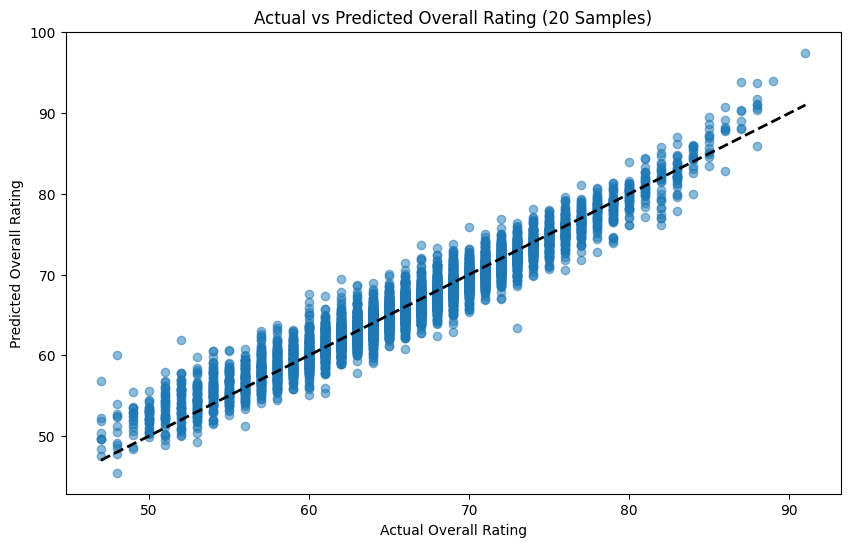

In [45]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:]
y_pred_sample = y_pred[:]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (20 Samples)')
plt.show()

In [53]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Tách dữ liệu thành biến mục tiêu và các thuộc tính đầu vào
y = df['overall_rating']
X = df.drop(columns=['overall_rating'])

# Tách tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Tạo pipeline với TargetEncoder, StandardScaler và LinearRegression
pipeline = Pipeline([
    ('target_encoder', TargetEncoder(cols=['nationality'])),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Sử dụng cross_val_score để đánh giá mô hình với 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# Hiển thị kết quả
print("Cross-Validation Scores (MSE):", -scores)
print("Mean MSE:", -scores.mean())


Cross-Validation Scores (MSE): [ 2.93084733 11.09175461  3.08091704  2.81843331  3.38469977]
Mean MSE: 4.661330410438457


In [52]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Hiển thị kết quả
print("Cross-Validation Scores (R^2):", scores)
print("Mean R^2:", scores.mean())

Cross-Validation Scores (R^2): [0.93934895 0.93342119 0.93011434 0.93035961 0.93458956]
Mean R^2: 0.9335667297170636


In [54]:
# Định nghĩa số lượng folds cho cross-validation
cv = 5

# Sử dụng cross_val_score để tính toán R^2 score
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

# Sử dụng cross_val_score để tính toán MSE (sử dụng scoring 'neg_mean_squared_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# Chuyển đổi MSE về giá trị dương
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

# Đánh giá Mean Absolute Error (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 5-fold cross-validation: [ 0.8865989  -0.01540437 -0.27262989 -0.46814074  0.75257834]
R^2 trung bình: 0.177 ± 0.546

MSE cho 5-fold cross-validation: [ 2.93084733 11.09175461  3.08091704  2.81843331  3.38469977]
MSE trung bình: 4.661± 3.221

MAE cho 5-fold cross-validation: [1.32798313 2.73547222 1.39091169 1.32846262 1.41185424]
MAE trung bình: 1.639 ± 0.549
